<h1> Advanced Concepts in Machine Learning</h1>	
<h2> Homework 1</h2>	

In [1]:
def xavier_weight_initialization(weight_set_1, weight_set_2, n):
    lower_bound, upper_bound = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
    for i in range(len(weight_set_1)):
        for j in range(len(weight_set_1[i])):
             weight_set_1[i][j] =  random.uniform(lower_bound, upper_bound)  
                
    for i in range(len(weight_set_2)):
        for j in range(len(weight_set_2[i])):
             weight_set_2[i][j] =  random.uniform(lower_bound, upper_bound)   
    
    return weight_set_1, weight_set_2                

In [2]:
import numpy as np
import random
from math import sqrt
from numpy.random import rand


training = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1]])

testing = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1]]).T

# Initializes random weights
#weights from input->hidden from 8 input nodes to 3 hidden nodes

weights_hidden = np.random.random((8, 3))
#weights from hidden->output from 3 nodes to 8 output nodes
weights_output = np.random.random((3, 8))

weights_hidden, weights_output = xavier_weight_initialization(weights_hidden, weights_output, 8)

bias_hidden = np.random.rand(1)
bias_output = np.random.rand(1)
#learning rate
lr=0.1

# Sigmoid Function

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Gradient of the sigmoid

In [4]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

## Prediction, given the model and sample outputs

In [5]:
# given a test input and the weights corresponding the the network , 
# will predict what the output of the network will be.
def predict(y, weights_1, weigths_2):
    activate_hidden_layer = sigmoid(np.dot(y, weights_1))
    activate_output_layer = sigmoid(np.dot(activate_hidden_layer, weigths_2))
    output = np.zeros(8)
    max_value = np.argmax(activate_output_layer)
    output[max_value] = 1
    # returns true if the prediction is correct, false if not
    if(np.array_equal(np.around(output),y)):
        return True
    else:
        return False

# Training + Accuracy 

In [6]:
accuracy_history = list()
for epochs in range(100):
    for iteration in range(epochs):
        #------------------------------------------------------------------------
        # Hidden Layer
        # Output from hidden layer
        # Activates the neurons using the sigmoid activation function
        output_hidden = sigmoid(np.dot(training, weights_hidden) + bias_hidden)
        #------------------------------------------------------------------------
        # Output Layer
        #Input for output layer
        #Output from output layer
        output_output_layer = sigmoid(np.dot(output_hidden, weights_output) + bias_output)
        #------------------------------------------------------------------------
        # Error computation
        #Calculate mean squared error
        error_output = ((1/2)*(np.power((output_output_layer - testing), 2)))
        #calculate delta without taking bias into account
        #delta between Hidden layer and Output
        #ot = error between output and target
        error_ot = output_output_layer - testing
        der_hidden_output = sigmoid_der(np.dot(output_hidden, weights_output) + bias_output)
        t_output_hidden = output_hidden
        #delta of weights between hidden layer and output
        delta_ho = np.dot(t_output_hidden.T, error_ot * der_hidden_output)
        #Update weights of hidden layer -> find the weight matrix for the hidden␣
        error_io = error_ot * der_hidden_output
        der_weights_output = weights_output
        error_ho = np.dot(error_io, der_weights_output.T)
        der_input_hidden = sigmoid_der(np.dot(training, weights_hidden) + bias_hidden)
        t_input_hidden = training
        # Delta of weights between hidden layer and output
        delta_ih = np.dot(t_input_hidden.T, der_input_hidden * error_ho)
        #update weights
        weights_output -= lr * delta_ho
        weights_hidden -= lr * delta_ih
        #Update biases
        #bias_output -= lr * delta_ho
        #bias_hidden -= lr * delta_ih
    #---------------------------------------------------------
    # Compute the accuracy using test data (validation set)
    test_vector = list()
    for index in range(20):
        vector = np.zeros(8)
        rand_index = random.randint(0,7)
        vector[rand_index] = 1
        test_vector.append(vector)
    # Counts how many correct instances the model classified    
    count = 0     
    for i in range(len(test_vector)):
         if(predict(test_vector[i],weights_hidden, weights_output)):
            count = count+1
    # Compute the average of correct instances
    accuracy = count/len(test_vector)  
    # Add it to the history vector (for plotting purposes)
    accuracy_history.append(accuracy*100)

# Testing the final accuracy of the model 

In [7]:
# test with 100 random data 
test_vector = list()
for index in range(100):
    vector = np.zeros(8)
    rand_index = random.randint(0,7)
    vector[rand_index] = 1
    test_vector.append(vector)

count = 0     
for i in range(len(test_vector)):
     if(predict(test_vector[i],weights_hidden, weights_output)):
        count = count+1
        
accuracy = count/len(test_vector)         
print(accuracy*100, '%')

100.0 %


# Plotting the validation set accuracy 

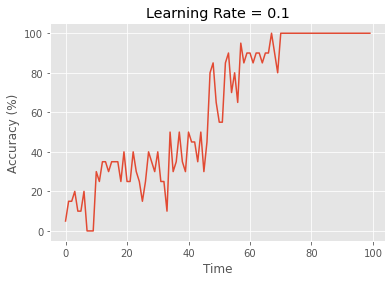

In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(accuracy_history)
plt.title('Learning Rate = 0.1')
plt.ylabel('Accuracy (%)')
plt.xlabel('Time')
plt.show()